Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("CensusIncom.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32560, 15)

There are 32560 rows and 15 columns present in the dataset

In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

The data consist of integer type and object type of datatypes present in the data

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


There are 9 integer type of data and 9 object type of data present in the dataset, total 15 columns present in the data

We have dropped the education feature. Which is a duplicate feature of education_num, but in a nonnumerical format.
The matching education level of the education number:

1: Preschool, 2: 1st-4th, 3: 5th-6th, 4: 7th-8th, 5: 9th, 6: 10th, 7: 11th, 8: 12th, 9: HS-grad,

10: Some-college, 11: Assoc-voc, 12: Assoc-acdm, 13: Bachelors, 14: Masters, 15: Prof-school, 16: Doctorate

# EDA

In [7]:
#check for null values present in the data
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values present in the data

<AxesSubplot:>

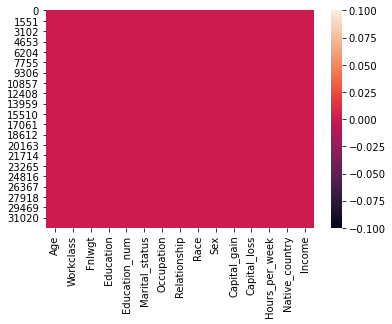

In [8]:
#visualizing null data with the heatmap
sns.heatmap(df.isnull())

There is no missing data present in the dataset

In [9]:
#check for duplicates

print("Before removing duplicates:",df.duplicated().sum())

df=df[~df.duplicated()]

print("After removing duplicates:",df.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


There are 24 duplicate rows present in the dataset we have removed it

In [10]:
df.Sex.value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

There are males 21774 and Females 10762 in the dataset

In [11]:
df.Workclass.value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

There is a '?' in Workclass means the worktype is unknown.we have to handle it by filling with 'unknown'

In [12]:
change_columns = ['Workclass', 'Occupation', 'Native_country']
for column in change_columns:
        df[column] = df[column].replace({'?': 'Unknown'})

In [13]:
df['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [14]:
edu_var=df['Education'].unique()
for var in edu_var:
    print("For {} the Education number is {}".format(var,df[df['Education']==var]['Education_num'].value_counts()))

For  Bachelors the Education number is 13    5352
Name: Education_num, dtype: int64
For  HS-grad the Education number is 9    10494
Name: Education_num, dtype: int64
For  11th the Education number is 7    1175
Name: Education_num, dtype: int64
For  Masters the Education number is 14    1722
Name: Education_num, dtype: int64
For  9th the Education number is 5    514
Name: Education_num, dtype: int64
For  Some-college the Education number is 10    7282
Name: Education_num, dtype: int64
For  Assoc-acdm the Education number is 12    1067
Name: Education_num, dtype: int64
For  Assoc-voc the Education number is 11    1382
Name: Education_num, dtype: int64
For  7th-8th the Education number is 4    645
Name: Education_num, dtype: int64
For  Doctorate the Education number is 16    413
Name: Education_num, dtype: int64
For  Prof-school the Education number is 15    576
Name: Education_num, dtype: int64
For  5th-6th the Education number is 3    332
Name: Education_num, dtype: int64
For  10th the 

Education_num and Education are just same,so,Education column could be dropped

In [15]:
df.drop(['Education'],axis=1,inplace=True)

# DataVisualization

## Univariate Analysis

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


<AxesSubplot:ylabel='Income'>

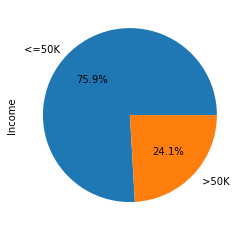

In [16]:
print(df['Income'].value_counts())
df['Income'].value_counts().plot.pie(autopct='%1.1f%%')

75% peoplehaving income<=50k,24% people earning>50k

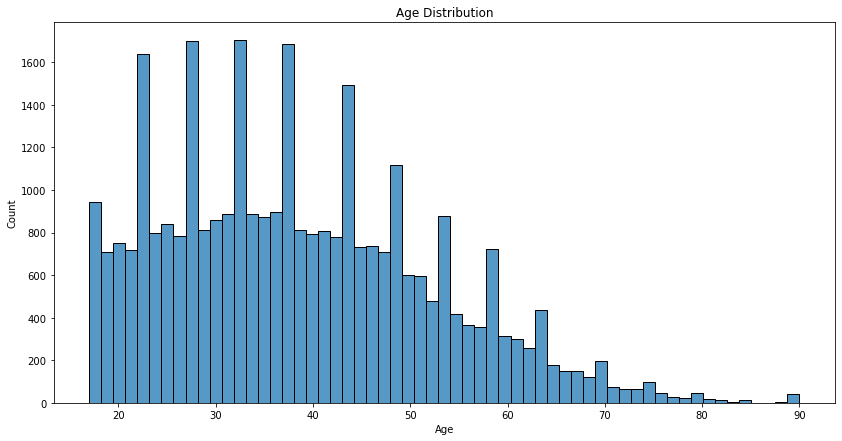

In [17]:
plt.figure(figsize=(14,7))
sns.histplot(x=df['Age'])
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()


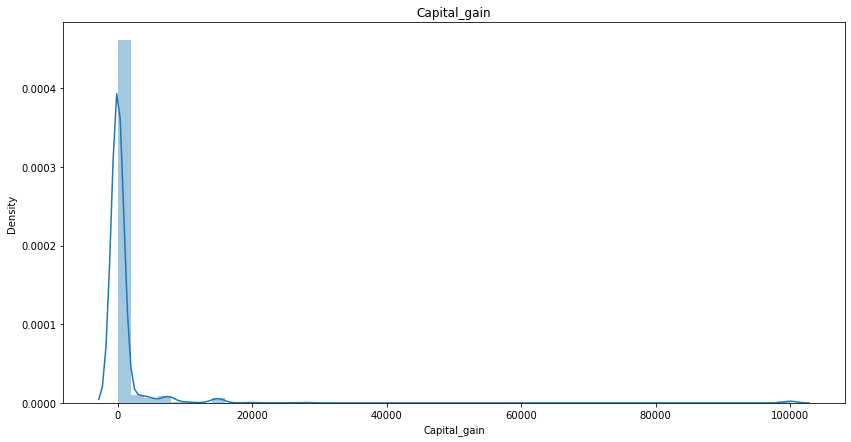

In [18]:
plt.figure(figsize=(14,7))
sns.distplot(x=df['Capital_gain'])
plt.xlabel("Capital_gain")
plt.title("Capital_gain")
plt.show()

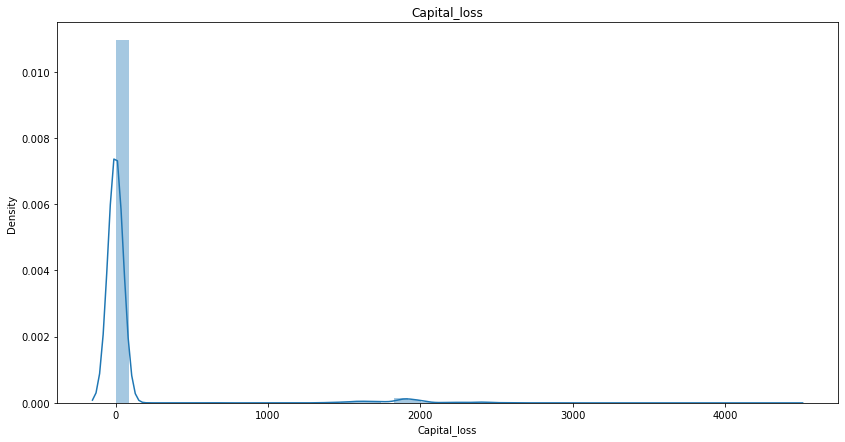

In [19]:
plt.figure(figsize=(14,7))
sns.distplot(x=df['Capital_loss'])
plt.xlabel("Capital_loss")
plt.title("Capital_loss")
plt.show()

Capital_loss is normally distributed but rightskewed

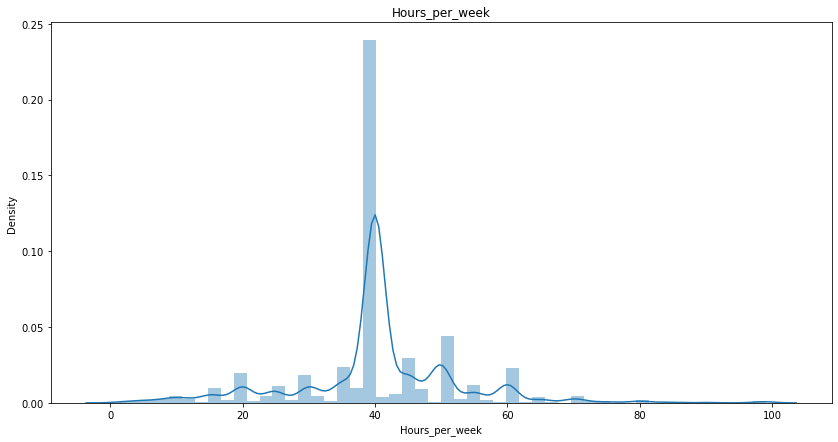

In [20]:
plt.figure(figsize=(14,7))
sns.distplot(x=df['Hours_per_week'])
plt.xlabel("Hours_per_week")
plt.title("Hours_per_week")
plt.show()

Hours_per_week is not normally distributed it is left skewed and right skewed

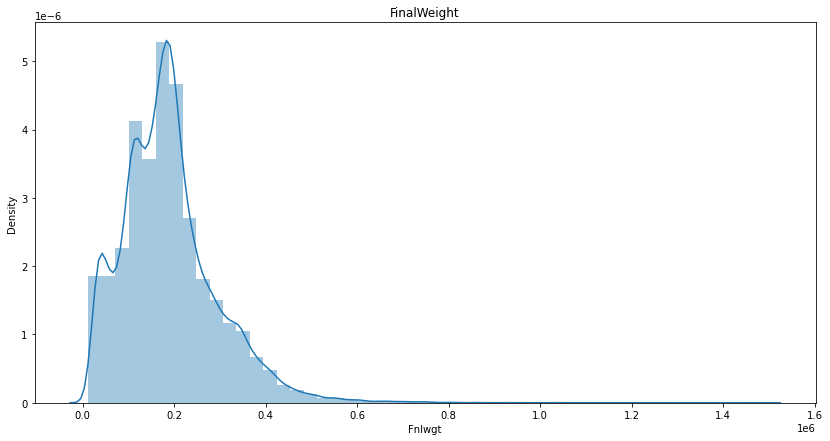

In [21]:
plt.figure(figsize=(14,7))
sns.distplot(x=df['Fnlwgt'])
plt.xlabel("Fnlwgt")
plt.title("FinalWeight")
plt.show()

This column represents nothing relavant tot the prediction we can drop it

### Categeorical-column-visualization

<AxesSubplot:xlabel='Workclass', ylabel='count'>

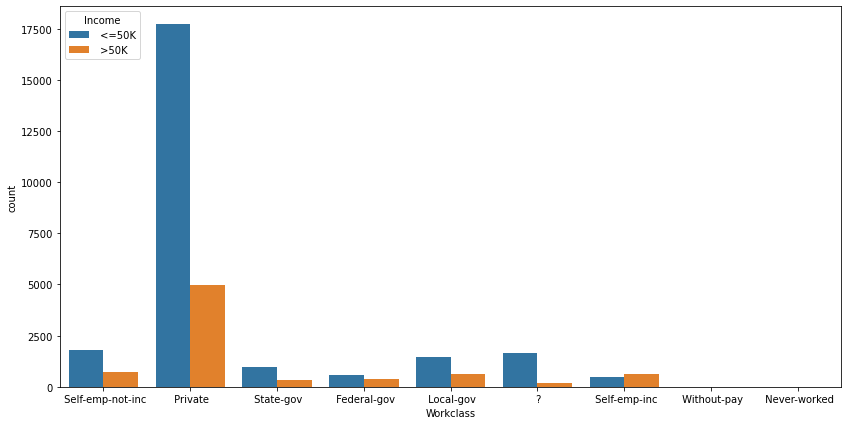

In [22]:
plt.figure(figsize=(14,7))
sns.countplot(df['Workclass'],hue=df['Income'],data=df)

PrivateEmployees are more with income <=50k than other work class

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

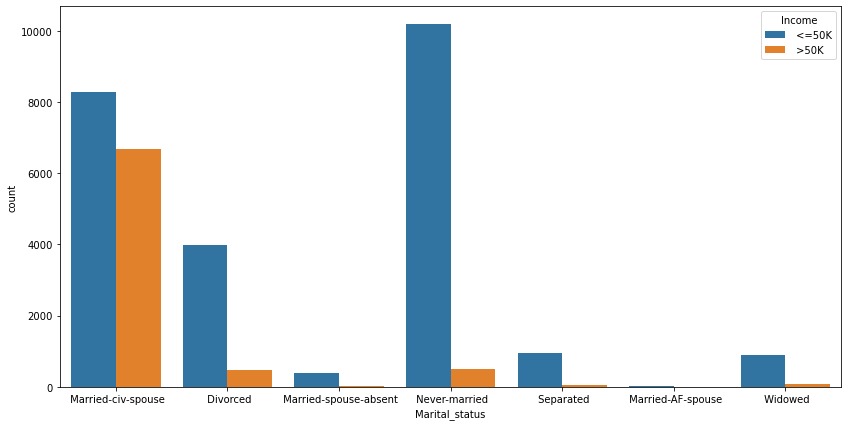

In [23]:
plt.figure(figsize=(14,7))
sns.countplot(df['Marital_status'],hue=df['Income'],data=df)

Never_married people earning income of 10000,
Married-civ-spopuse are earning income of 8000

<AxesSubplot:xlabel='Occupation', ylabel='count'>

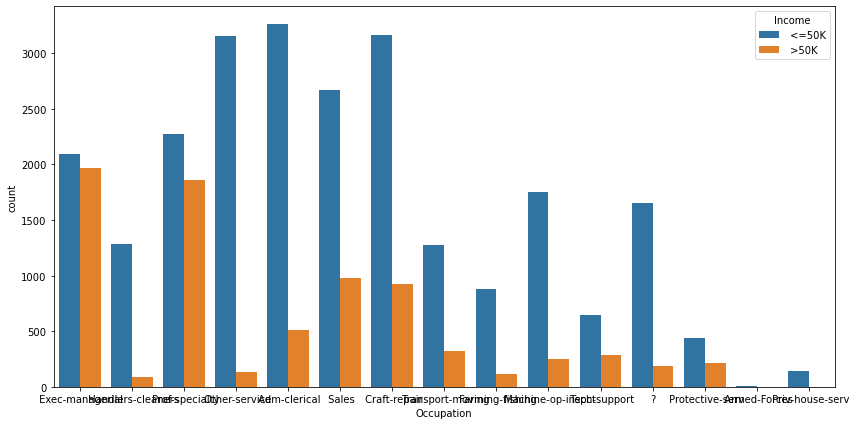

In [24]:
plt.figure(figsize=(14,7))
sns.countplot(df['Occupation'],hue=df['Income'],data=df)

In [25]:
df['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [26]:
pd.isnull(df['Occupation']).value_counts()

False    32536
Name: Occupation, dtype: int64

In [27]:
df['Relationship'].value_counts()

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

Two columns Relationship and Marital_status carry similar information.

<AxesSubplot:xlabel='Race', ylabel='count'>

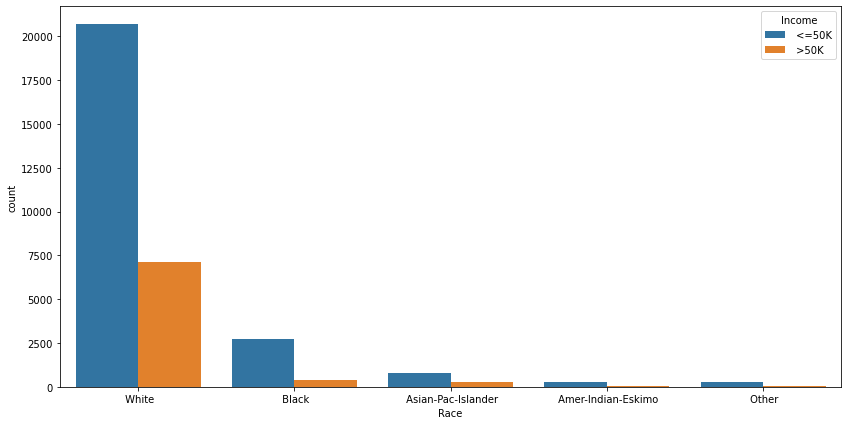

In [28]:
plt.figure(figsize=(14,7))
sns.countplot(df['Race'],hue=df['Income'],data=df)

The majority of people are white race

<AxesSubplot:ylabel='Sex'>

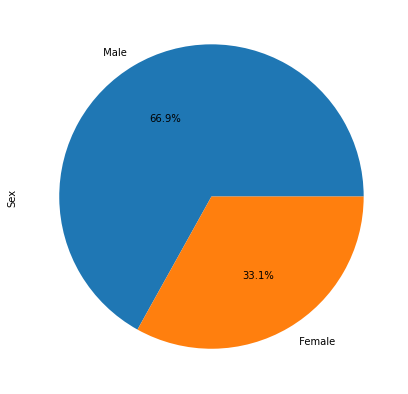

In [29]:
plt.figure(figsize=(14,7))
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')

Males 66.9% and females are 33.1%

<AxesSubplot:xlabel='Sex', ylabel='count'>

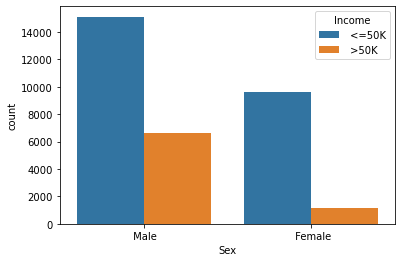

In [32]:
sns.countplot(df['Sex'],hue=df['Income'])

Males are more than females in earining <=50k

### Bi-VariateAnalysis NumericalColumns

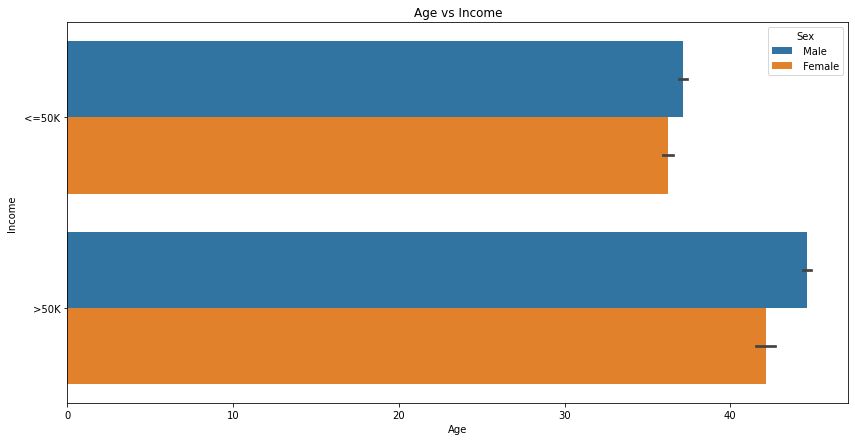

In [34]:
plt.figure(figsize=(14,7))
sns.barplot(x=df['Age'],y=df['Income'], hue=df['Sex'],data=df)
plt.xlabel("Age")
plt.ylabel('Income')
plt.title("Age vs Income")
plt.show()

Males having highest income i.e>50k with the age above 40, than females 

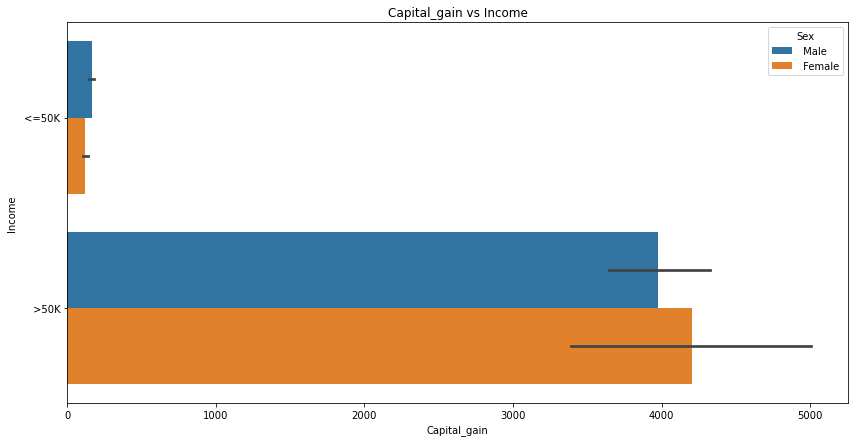

In [35]:
plt.figure(figsize=(14,7))
sns.barplot(x=df['Capital_gain'],y=df['Income'], hue=df['Sex'],data=df)
plt.xlabel("Capital_gain")
plt.ylabel('Income')
plt.title("Capital_gain vs Income")
plt.show()

females  having highest capital_gain with the income>50k than males

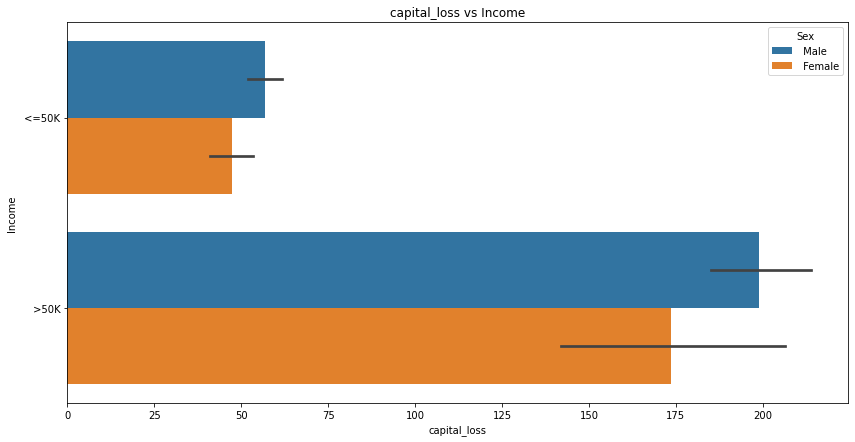

In [36]:
plt.figure(figsize=(14,7))
sns.barplot(x=df['Capital_loss'],y=df['Income'], hue=df['Sex'],data=df)
plt.xlabel("capital_loss")
plt.ylabel('Income')
plt.title("capital_loss vs Income")
plt.show()

males capital_loss is upto 200 with the income>50k than males

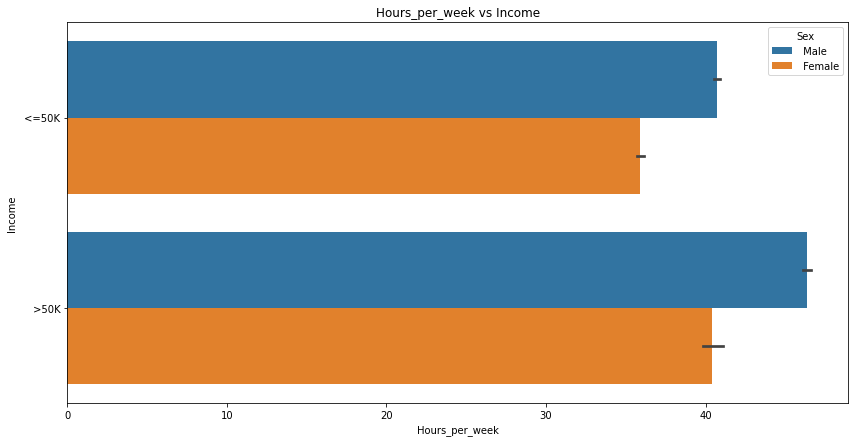

In [37]:
plt.figure(figsize=(14,7))
sns.barplot(x=df['Hours_per_week'],y=df['Income'], hue=df['Sex'],data=df)
plt.xlabel("Hours_per_week")
plt.ylabel('Income')
plt.title("Hours_per_week vs Income")
plt.show()

males are working morethan 40 hours per week than females and getttig highest income

# Correlation

In [38]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515
Fnlwgt,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900
Education_num,0.036224,-0.043353,1.000000,0.122661,0.079901,0.148426
Capital_gain,0.077676,0.000433,0.122661,1.000000,-0.031638,0.078408
Capital_loss,0.057745,-0.010267,0.079901,-0.031638,1.000000,0.054229
Hours_per_week,0.068515,-0.018900,0.148426,0.078408,0.054229,1.000000


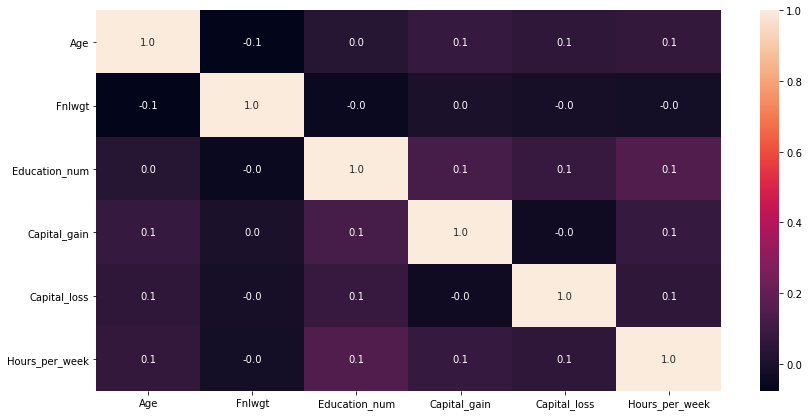

In [39]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

There is no high linear correlation with features

In [40]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


There is a large gap between capital_gain of 75% and max values and capital_loss 75% and max values may be some outliers present in the data

In [41]:

df.skew()

Age                0.557657
Fnlwgt             1.447695
Education_num     -0.309454
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
dtype: float64

capital_gain has the highest skew value

# Encoding the DataFrame

Our data consist of categeorical data so, we convert them into Numerical using OrdinalEncoder

In [42]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [43]:
df.corr()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003781,-0.076448,0.036224,-0.266142,-0.020911,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.001524,0.234039
Workclass,0.003781,1.000000,-0.016532,0.052099,-0.064828,0.255105,-0.090421,0.049717,0.095960,0.033845,0.012255,0.139059,-0.007697,0.051706
Fnlwgt,-0.076448,-0.016532,1.000000,-0.043353,0.028154,0.001360,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.051866,-0.009521
Education_num,0.036224,0.052099,-0.043353,1.000000,-0.069196,0.109804,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.050127,0.335299
Marital_status,-0.266142,-0.064828,0.028154,-0.069196,1.000000,-0.009778,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.023414,-0.199187
Occupation,-0.020911,0.255105,0.001360,0.109804,-0.009778,1.000000,-0.075600,0.006811,0.080532,0.025513,0.017977,0.080502,-0.012394,0.075398
Relationship,-0.263744,-0.090421,0.008859,-0.094424,0.185542,-0.075600,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.005634,-0.250955
Race,0.029116,0.049717,-0.021484,0.031998,-0.067942,0.006811,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.137847,0.071855
Sex,0.088708,0.095960,0.027113,0.012181,-0.129425,0.080532,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,-0.008262,0.215984
Capital_gain,0.077676,0.033845,0.000433,0.122661,-0.043373,0.025513,-0.057945,0.011152,0.048486,1.000000,-0.031638,0.078408,-0.002036,0.223340


<AxesSubplot:>

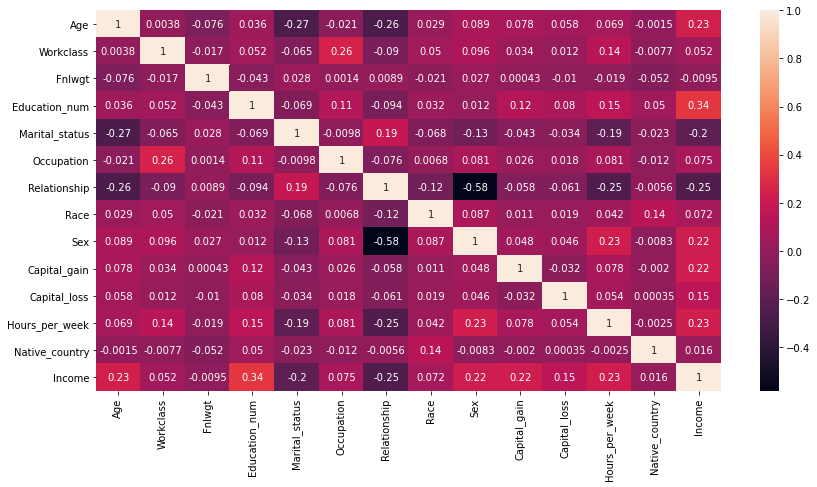

In [44]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

In [45]:
df.skew()

Age                0.557657
Workclass         -0.751854
Fnlwgt             1.447695
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.114542
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -3.661060
Income             1.211640
dtype: float64

workclass,Fnlwgt,Relationship,Race,Sex,Capital_gain,Capital_loss,Native_country are abive the threshold value of skewness i.e +/-0.5

# Checking Outliers

Age                  AxesSubplot(0.125,0.125;0.0466867x0.755)
Workclass         AxesSubplot(0.181024,0.125;0.0466867x0.755)
Fnlwgt            AxesSubplot(0.237048,0.125;0.0466867x0.755)
Education_num     AxesSubplot(0.293072,0.125;0.0466867x0.755)
Marital_status    AxesSubplot(0.349096,0.125;0.0466867x0.755)
Occupation         AxesSubplot(0.40512,0.125;0.0466867x0.755)
Relationship      AxesSubplot(0.461145,0.125;0.0466867x0.755)
Race              AxesSubplot(0.517169,0.125;0.0466867x0.755)
Sex               AxesSubplot(0.573193,0.125;0.0466867x0.755)
Capital_gain      AxesSubplot(0.629217,0.125;0.0466867x0.755)
Capital_loss      AxesSubplot(0.685241,0.125;0.0466867x0.755)
Hours_per_week    AxesSubplot(0.741265,0.125;0.0466867x0.755)
Native_country    AxesSubplot(0.797289,0.125;0.0466867x0.755)
Income            AxesSubplot(0.853313,0.125;0.0466867x0.755)
dtype: object

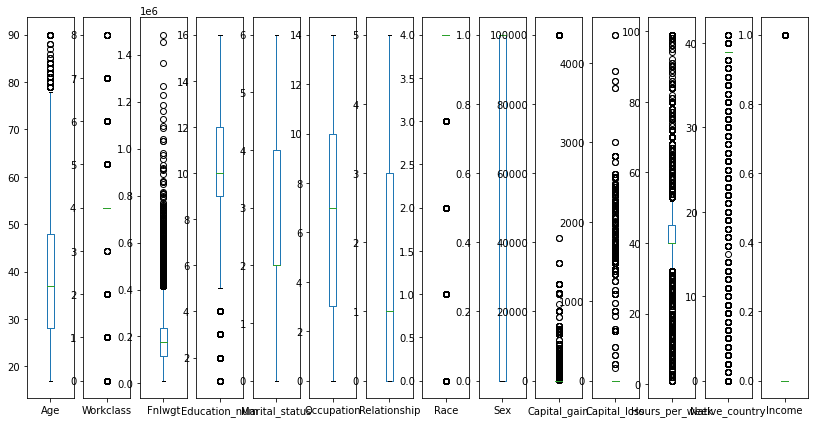

In [46]:
df.plot(kind='box',subplots=True,figsize=(14,7))


Age,FnlWgt,Education_num,RAce,Capital_gain,Capital_loss,Hours_per_week,Native_country columns consist of outliers

# Removing Outliers

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,37,4.0,284582,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
5,49,4.0,160187,5,3.0,8.0,1.0,2.0,0.0,0,0,16,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [48]:
data_loss=df.shape[0]-df_new.shape[0]
data_loss

5137

There are 5137 rows were deleted

# seperating columns into features and Target

In [49]:
x=df_new.drop(['Income'],axis=1)
y=df_new['Income']

### Transforming data to remove skewness

In [50]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.92363868,  1.65163213, -1.12472315, ..., -0.0405598 ,
        -2.21440076,  0.17197579],
       [ 0.12821503,  0.01679972,  0.41301511, ..., -0.0405598 ,
        -0.03830918,  0.17197579],
       [ 1.09823695,  0.01679972,  0.59309239, ..., -0.0405598 ,
        -0.03830918,  0.17197579],
       ...,
       [ 1.37237747,  0.01679972, -0.24849206, ..., -0.0405598 ,
        -0.03830918,  0.17197579],
       [-1.32765987,  0.01679972,  0.27468438, ..., -0.0405598 ,
        -1.72055305,  0.17197579],
       [ 1.04093763,  0.80105296,  1.0632107 , ..., -0.0405598 ,
        -0.03830918,  0.17197579]])

In [51]:
pd.DataFrame(x).skew()

0     -0.018257
1      0.073487
2     -0.035035
3      0.027948
4     -0.128574
5     -0.182766
6      0.108596
7     -2.532931
8     -0.684100
9      3.068316
10    24.615740
11     0.104575
12     0.785897
dtype: float64

# checking VIF

In [52]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
sc=StandardScaler()
scaled=sc.fit_transform(df_new)
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif["features"]=pd.DataFrame(df.columns)
vif

,vif,features
0,8.604364,Age
1,8.470047,Workclass
2,4.031422,Fnlwgt
3,16.348121,Education_num
4,4.069938,Marital_status
5,3.698921,Occupation
6,2.643510,Relationship
7,17.556746,Race
8,4.463882,Sex
9,1.083708,Capital_gain


# Model Building

Here target variable is of Binary variable so,we use classification

In [53]:
x=df.drop(['Income'],axis=1)
y=df['Income']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    le=LogisticRegression()
    le.fit(x_train,y_train)
    pred_train=le.predict(x_train)
    pred_test=le.predict(x_test)
    print(f"At Random State {i} the trainig accuracy is :",accuracy_score(y_train,pred_train))
    print(f"At Random State {i} the testing accuracy is:",accuracy_score(y_test,pred_test))
    print("\n")

At Random State 1 the trainig accuracy is : 0.7873059781773475
At Random State 1 the testing accuracy is: 0.7858020897357099


At Random State 2 the trainig accuracy is : 0.7881512217611802
At Random State 2 the testing accuracy is: 0.7836508912108174


At Random State 3 the trainig accuracy is : 0.7971031197172276
At Random State 3 the testing accuracy is: 0.8000921942224954


At Random State 4 the trainig accuracy is : 0.7869217765483326
At Random State 4 the testing accuracy is: 0.7894898586355255


At Random State 5 the trainig accuracy is : 0.7873443983402489
At Random State 5 the testing accuracy is: 0.7854947756607252


At Random State 6 the trainig accuracy is : 0.7866912555709237
At Random State 6 the testing accuracy is: 0.7841118623232944


At Random State 7 the trainig accuracy is : 0.7979483633010604
At Random State 7 the testing accuracy is: 0.8083896742470805


At Random State 8 the trainig accuracy is : 0.7865759950822192
At Random State 8 the testing accuracy is: 0.788

At Random State 65 the trainig accuracy is : 0.7900338097433534
At Random State 65 the testing accuracy is: 0.7888752304855562


At Random State 66 the trainig accuracy is : 0.8016366989396035
At Random State 66 the testing accuracy is: 0.794560540872772


At Random State 67 the trainig accuracy is : 0.787498078991855
At Random State 67 the testing accuracy is: 0.7842655193607867


At Random State 68 the trainig accuracy is : 0.7863838942677117
At Random State 68 the testing accuracy is: 0.7908727719729564


At Random State 69 the trainig accuracy is : 0.7867680958967266
At Random State 69 the testing accuracy is: 0.7887215734480639


At Random State 70 the trainig accuracy is : 0.8007530351928692
At Random State 70 the testing accuracy is: 0.7973263675476336


At Random State 71 the trainig accuracy is : 0.8009451360073767
At Random State 71 the testing accuracy is: 0.7960971112476951


At Random State 72 the trainig accuracy is : 0.7878438604579684
At Random State 72 the testing accu

At Random State 129 the trainig accuracy is : 0.7862686337790072
At Random State 129 the testing accuracy is: 0.7910264290104487


At Random State 130 the trainig accuracy is : 0.7993699093284156
At Random State 130 the testing accuracy is: 0.8022433927473879


At Random State 131 the trainig accuracy is : 0.789303826648225
At Random State 131 the testing accuracy is: 0.7802704363859865


At Random State 132 the trainig accuracy is : 0.7861533732903028
At Random State 132 the testing accuracy is: 0.7933312845728334


At Random State 133 the trainig accuracy is : 0.7922621791916398
At Random State 133 the testing accuracy is: 0.7887215734480639


At Random State 134 the trainig accuracy is : 0.7871522975257416
At Random State 134 the testing accuracy is: 0.7913337430854334


At Random State 135 the trainig accuracy is : 0.7858075918241894
At Random State 135 the testing accuracy is: 0.7933312845728334


At Random State 136 the trainig accuracy is : 0.7880359612724758
At Random State 136

At Random State 192 the trainig accuracy is : 0.7879975411095743
At Random State 192 the testing accuracy is: 0.7890288875230486


At Random State 193 the trainig accuracy is : 0.7868449362225296
At Random State 193 the testing accuracy is: 0.7901044867854948


At Random State 194 the trainig accuracy is : 0.7863454741048101
At Random State 194 the testing accuracy is: 0.7919483712354026


At Random State 195 the trainig accuracy is : 0.7896111879514369
At Random State 195 the testing accuracy is: 0.7824216349108789


At Random State 196 the trainig accuracy is : 0.7994467496542186
At Random State 196 the testing accuracy is: 0.8030116779348494


At Random State 197 the trainig accuracy is : 0.7876133394805594
At Random State 197 the testing accuracy is: 0.7876459741856177


At Random State 198 the trainig accuracy is : 0.7880743814353773
At Random State 198 the testing accuracy is: 0.7833435771358328


At Random State 199 the trainig accuracy is : 0.7873443983402489
At Random State 19

At Random State 255 the trainig accuracy is : 0.8002919932380513
At Random State 255 the testing accuracy is: 0.7993239090350338


At Random State 256 the trainig accuracy is : 0.787190717688643
At Random State 256 the testing accuracy is: 0.7854947756607252


At Random State 257 the trainig accuracy is : 0.78711387736284
At Random State 257 the testing accuracy is: 0.7865703749231715


At Random State 258 the trainig accuracy is : 0.7864607345935147
At Random State 258 the testing accuracy is: 0.7905654578979717


At Random State 259 the trainig accuracy is : 0.7898417089288459
At Random State 259 the testing accuracy is: 0.7793484941610326


At Random State 260 the trainig accuracy is : 0.7859996926386967
At Random State 260 the testing accuracy is: 0.7896435156730178


At Random State 261 the trainig accuracy is : 0.787267558014446
At Random State 261 the testing accuracy is: 0.7865703749231715


At Random State 262 the trainig accuracy is : 0.7878822806208698
At Random State 262 th

At Random State 318 the trainig accuracy is : 0.7882280620869833
At Random State 318 the testing accuracy is: 0.7838045482483098


At Random State 319 the trainig accuracy is : 0.8004456738896573
At Random State 319 the testing accuracy is: 0.7971727105101414


At Random State 320 the trainig accuracy is : 0.797602581834947
At Random State 320 the testing accuracy is: 0.8096189305470191


At Random State 321 the trainig accuracy is : 0.7850391885661595
At Random State 321 the testing accuracy is: 0.7934849416103258


At Random State 322 the trainig accuracy is : 0.7865759950822192
At Random State 322 the testing accuracy is: 0.7899508297480025


At Random State 323 the trainig accuracy is : 0.7890348855079146
At Random State 323 the testing accuracy is: 0.7808850645359557


At Random State 324 the trainig accuracy is : 0.7878438604579684
At Random State 324 the testing accuracy is: 0.7836508912108174


At Random State 325 the trainig accuracy is : 0.7864607345935147
At Random State 325

At Random State 381 the trainig accuracy is : 0.7856539111725833
At Random State 381 the testing accuracy is: 0.7960971112476951


At Random State 382 the trainig accuracy is : 0.7896880282772399
At Random State 382 the testing accuracy is: 0.7876459741856177


At Random State 383 the trainig accuracy is : 0.8016366989396035
At Random State 383 the testing accuracy is: 0.7937922556853104


At Random State 384 the trainig accuracy is : 0.7883049024127863
At Random State 384 the testing accuracy is: 0.7838045482483098


At Random State 385 the trainig accuracy is : 0.7877285999692639
At Random State 385 the testing accuracy is: 0.7864167178856791


At Random State 386 the trainig accuracy is : 0.7880743814353773
At Random State 386 the testing accuracy is: 0.7876459741856177


At Random State 387 the trainig accuracy is : 0.7844628861226371
At Random State 387 the testing accuracy is: 0.7822679778733866


At Random State 388 the trainig accuracy is : 0.7853849700322729
At Random State 38

At Random State 444 the trainig accuracy is : 0.7889964653450131
At Random State 444 the testing accuracy is: 0.7801167793484942


At Random State 445 the trainig accuracy is : 0.7842323651452282
At Random State 445 the testing accuracy is: 0.7957897971727105


At Random State 446 the trainig accuracy is : 0.7876901798063624
At Random State 446 the testing accuracy is: 0.7870313460356484


At Random State 447 the trainig accuracy is : 0.7866144152451207
At Random State 447 the testing accuracy is: 0.795021511985249


At Random State 448 the trainig accuracy is : 0.7898801290917473
At Random State 448 the testing accuracy is: 0.7778119237861094


At Random State 449 the trainig accuracy is : 0.7873828185031505
At Random State 449 the testing accuracy is: 0.7879532882606023


At Random State 450 the trainig accuracy is : 0.7886891040418011
At Random State 450 the testing accuracy is: 0.7839582052858021


At Random State 451 the trainig accuracy is : 0.7873443983402489
At Random State 451

At RandomState 98 Thetraining and Testing accuracy is 0.800 

In [56]:
pred_test=le.predict(x_test)
accuracy_score(pred_test,y_test)

0.7908727719729564

# DecisionTreeClassifier

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print("cross_validation_score is:",cross_val_score(dtc,x,y,cv=5).mean())

Accuracy score is: 0.8171481253841426
[[4304  638]
 [ 552 1014]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      4942
         1.0       0.61      0.65      0.63      1566

    accuracy                           0.82      6508
   macro avg       0.75      0.76      0.75      6508
weighted avg       0.82      0.82      0.82      6508

cross_validation_score is: 0.8073211214361462



# KNN

In [61]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy is ",accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))
print("cross_val_score is",cross_val_score(knn,x,y,cv=5).mean())

Accuracy is  0.779041180086048
[[4581  361]
 [1077  489]]
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86      4942
         1.0       0.58      0.31      0.40      1566

    accuracy                           0.78      6508
   macro avg       0.69      0.62      0.63      6508
weighted avg       0.75      0.78      0.75      6508

cross_val_score is 0.7760941906541194


# SVC

In [62]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy_score is:",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print("cross_val_score is:",cross_val_score(svc,x,y,cv=5).mean())

Accuracy_score is: 0.7947141979102643
[[4938    4]
 [1332  234]]
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      4942
         1.0       0.98      0.15      0.26      1566

    accuracy                           0.79      6508
   macro avg       0.89      0.57      0.57      6508
weighted avg       0.83      0.79      0.73      6508

cross_val_score is: 0.7951499727634814


# RandomForestClassifier

In [63]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print("Accuracy is",accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))
print("cross_val_score is",cross_val_score(rfc,x,y,cv=5).mean())

Accuracy is 0.8560233558696988
[[4593  349]
 [ 588  978]]
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      4942
         1.0       0.74      0.62      0.68      1566

    accuracy                           0.86      6508
   macro avg       0.81      0.78      0.79      6508
weighted avg       0.85      0.86      0.85      6508

cross_val_score is 0.860155051214762


# GradientBoostingclassifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print("Accuracy is",accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))
print("cross_val_score is",cross_val_score(gbc,x,y,cv=5).mean())

Accuracy is 0.8641671788567916
[[4664  278]
 [ 606  960]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      4942
         1.0       0.78      0.61      0.68      1566

    accuracy                           0.86      6508
   macro avg       0.83      0.78      0.80      6508
weighted avg       0.86      0.86      0.86      6508

cross_val_score is 0.8643349665798896


# HyperPArameterTuning

In [65]:
from sklearn.model_selection import GridSearchCV
RFC=RandomForestClassifier()
rf_param_grid={ "max_features":[3,10],
               "min_samples_split":[3,10],
               "min_samples_leaf":[3,10],
               "bootstrap":[False],
               "n_estimators":[100,300]}
gsRFC=GridSearchCV(RFC,param_grid=rf_param_grid,cv=5)
gsRFC.fit(x_train,y_train)
RFC_best=gsRFC.best_estimator_
RFC_best

RandomForestClassifier(bootstrap=False, max_features=3, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=300)

In [67]:
rf=RandomForestClassifier(max_features=3,bootstrap=False,min_samples_leaf=3,min_samples_split=3,n_estimators=300)
rf.fit(x,y)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=accuracy_score(y_test,pred_decision)
print('accuracyscore',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)


accuracyscore 94.6220036877689
cross val score: 86.38125232067702



# AUC ROC curve

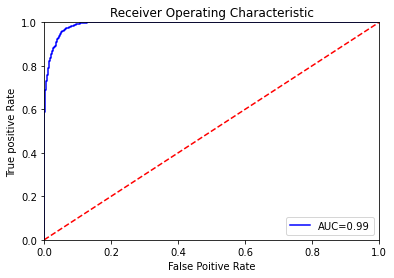

In [68]:
#AUC ROC curve
from sklearn import metrics
probs=rf.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive Rate')
plt.xlabel('False Poitive Rate')
plt.show()

### we are getting RandomForestClassifier model accuracy score as 94.6% and cross_val_score as 86.38, so,we accept this model

# Saving the Model

In [69]:
import pickle
file_name='Census_income_prediction.pkl'
pickle.dump(rf,open(file_name,'wb'))